# CityLines

## Download the dataset

Download the CSV files from https://kaggle.com/citylines/city-lines into a subfolder called `citylines` and unzip them.

In [1]:
ls citylines

cities.csv  station_lines.csv  systems.csv      tracks.csv
lines.csv   stations.csv       track_lines.csv


# Reading CSV files 

## Using the standard libary module csv

In [2]:
import csv

In [3]:
with open('citylines/cities.csv') as f:
    reader = csv.DictReader(f)
    cities = [line for line in reader]

In [4]:
print(len(cities))

334


## Loading CSVs using pandas

In [5]:
import pandas as pd
transport_systems = pd.read_csv('citylines/systems.csv', index_col='id')
cities = pd.read_csv('citylines/cities.csv', index_col="id")
track_lines = pd.read_csv('citylines/track_lines.csv', index_col='id')
stations = pd.read_csv('citylines/stations.csv', index_col='id')
station_lines = pd.read_csv('citylines/station_lines.csv', index_col='id')
lines = pd.read_csv('citylines/lines.csv', index_col='id')
tracks = pd.read_csv('citylines/tracks.csv', index_col='id')

In [6]:
cities

name                             coords  start_year   url_name  \
id                                                                         
5     Aberdeen                 POINT(-2.15 57.15)      2017.0   aberdeen   
6     Adelaide          POINT(138.6 -34.91666667)      2017.0   adelaide   
7      Algiers               POINT(3 36.83333333)      2017.0    algiers   
9       Ankara     POINT(32.91666667 39.91666667)      2017.0     ankara   
16       Belém   POINT(-48.48333333 -1.466666667)      2017.0      belem   
..         ...                                ...         ...        ...   
265     Nantes         POINT(-1.553889 47.217222)      1877.0     nantes   
110  Stockholm           POINT(18.05 59.28333333)      1919.0  stockholm   
266     Rennes         POINT(-1.680833 48.114167)      1897.0     rennes   
15     Beijing     POINT(116.4166667 39.91666667)      1965.0    beijing   
69      London  POINT(-0.08333333333 51.53333333)      1833.0     london   

       country country_state  
id                            
5     Scotland           NaN  
6    Australia           NaN  
7      Algeria           NaN  
9       Turkey           NaN  
16      Brazil           NaN  
..         ...           ...  
265     France           NaN  
110     Sweden           NaN  
266     France           NaN  
15       China           NaN  
69     England           NaN  

[334 rows x 6 columns]

`pandas` dataframes provide many methods for working with tabular data. 

In [7]:
# addressing a specific cells of a pandas data frame
cities['name'][16]

'Belém'

## Parsing coordinate strings

Somd data in this data set are not normalized, i.e. entire sets of values are written into individual cells in the form of string. These need to be parsed out. For example, the `geometry` field in the the `tracks` table contains the coordinates of the line waypoints as a string.

In [8]:
g = tracks['geometry'][16]
g

'LINESTRING(-58.4565034467506 -34.5622493173683,-58.4577927653747 -34.5607441036916,-58.4591937797194 -34.5591074989372,-58.4607837178131 -34.5573661677451,-58.4616310994955 -34.5564367568353,-58.4624199130135 -34.5556111854062)'

In [9]:
# find the positions of the opening and closing parenthesis
start, end = g.find('('), g.find(')')
start, end

(10, 226)

In [10]:
# extract the part inside the parenthesis
g[start+1:end]

'-58.4565034467506 -34.5622493173683,-58.4577927653747 -34.5607441036916,-58.4591937797194 -34.5591074989372,-58.4607837178131 -34.5573661677451,-58.4616310994955 -34.5564367568353,-58.4624199130135 -34.5556111854062'

In [11]:
# split the coordinate pairs into a list
g[start+1:end].split(',')

['-58.4565034467506 -34.5622493173683',
 '-58.4577927653747 -34.5607441036916',
 '-58.4591937797194 -34.5591074989372',
 '-58.4607837178131 -34.5573661677451',
 '-58.4616310994955 -34.5564367568353',
 '-58.4624199130135 -34.5556111854062']

In [12]:
# finally, convert into a 2D numpy array
import numpy as np
points = [[float(f) for f in pair.split(' ')]  for pair in g[start+1:end].split(',')]
np.array(points)

array([[-58.45650345, -34.56224932],
       [-58.45779277, -34.5607441 ],
       [-58.45919378, -34.5591075 ],
       [-58.46078372, -34.55736617],
       [-58.4616311 , -34.55643676],
       [-58.46241991, -34.55561119]])

### organize parsers as functions

Now organize compose these steps into a function: 

In [13]:
def parse_linestring(geometry):
    """
    :param geometry: a string in the format "LINESTRING(x1 y1, x2 y2, ..., xn yn)"
    return numpy array of shape (n, 2) with coordinates
    """
    start = geometry.find('(')
    end = geometry.find(')')
    substring = geometry[start+1:end]
    return np.array(
        [[float(f) for f in pair.split(' ')] for pair in substring.split(',')])
    

In [14]:
# test it
parse_linestring(tracks['geometry'][2563])

array([[16.4151057, 48.1907238],
       [16.4156455, 48.190389 ],
       [16.4170845, 48.1895171]])

In [15]:
# similarly, define a function that takes a single point for the city coords for example.
def parse_point(coords):
    """
    :param coords: a string in the form "POINT(x, y)"
    :return: [x, y] as floats
    """
    start, end = coords.find('('), coords.find(')')
    return [float(p) for p in coords[start+1:end].split(' ')]

In [16]:
cities['name'][16], parse_point(cities['coords'][16])

('Belém', [-48.48333333, -1.466666667])

### Plot all cities
Use our point parsing function to plot all cities on the map

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt

In [18]:
city_points = np.array([parse_point(p) for p in cities['coords']])

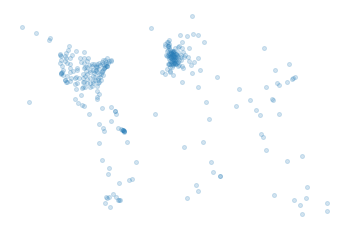

In [19]:
plt.scatter(city_points[:,0], city_points[:,1], s=16, alpha=0.2);
plt.axis(False);

### plot the transit system of a given city

In [20]:
cities

name                             coords  start_year   url_name  \
id                                                                         
5     Aberdeen                 POINT(-2.15 57.15)      2017.0   aberdeen   
6     Adelaide          POINT(138.6 -34.91666667)      2017.0   adelaide   
7      Algiers               POINT(3 36.83333333)      2017.0    algiers   
9       Ankara     POINT(32.91666667 39.91666667)      2017.0     ankara   
16       Belém   POINT(-48.48333333 -1.466666667)      2017.0      belem   
..         ...                                ...         ...        ...   
265     Nantes         POINT(-1.553889 47.217222)      1877.0     nantes   
110  Stockholm           POINT(18.05 59.28333333)      1919.0  stockholm   
266     Rennes         POINT(-1.680833 48.114167)      1897.0     rennes   
15     Beijing     POINT(116.4166667 39.91666667)      1965.0    beijing   
69      London  POINT(-0.08333333333 51.53333333)      1833.0     london   

       country country_state  
id                            
5     Scotland           NaN  
6    Australia           NaN  
7      Algeria           NaN  
9       Turkey           NaN  
16      Brazil           NaN  
..         ...           ...  
265     France           NaN  
110     Sweden           NaN  
266     France           NaN  
15       China           NaN  
69     England           NaN  

[334 rows x 6 columns]

First, learn about the Python `zip` function to be able to iterate over two sequencies at once.

In [21]:
seq1 = 1, 2, 3
seq2 = 'abc'

In [22]:
for i in seq1:
    print(i)
for j in seq2:
    print(j)

1
2
3
a
b
c


In [23]:
# iterate over both sequences at once
for i in range(len(seq1)):
    print(seq1[i], seq2[i])

1 a
2 b
3 c


In [24]:
# same thing with zip
for i, j in zip(seq1, seq2):
    print(i, j)

1 a
2 b
3 c


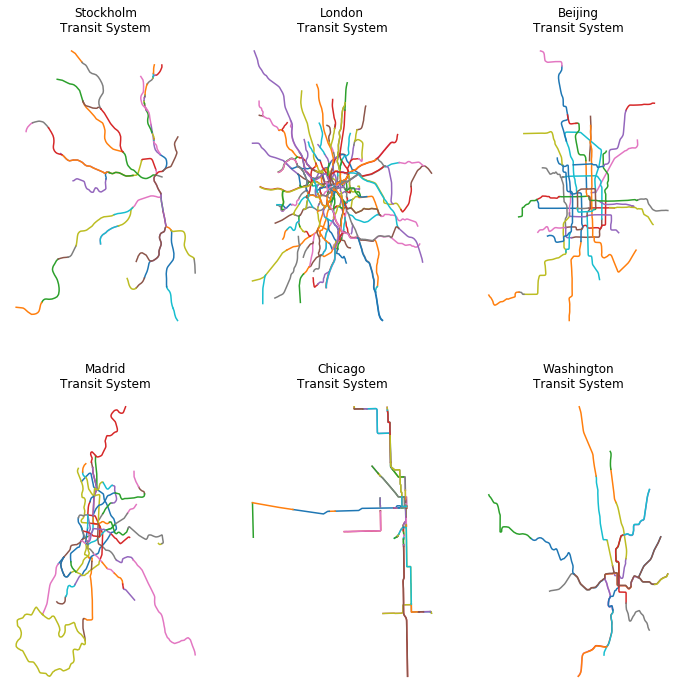

In [25]:
codes = 110, 69, 15, 71, 147, 252

fig, axx = plt.subplots(2, 3, figsize=(12, 12))

for code, ax in zip(codes, axx.flatten()):
    name = cities['name'][code]
    for line in tracks[tracks['city_id'] == code]['geometry']:
        xy = parse_linestring(line)
        ax.plot(xy[:,0], xy[:, 1])
    ax.set_title(f'{name}\nTransit System')
    ax.axis(False);
    
fig.savefig('map.png', dpi=300)

Now recall our function `route_length` from Homework Set 3 to compute the length of a route from the coordinates of its waypoints. 

In [26]:
# compute the length (km) of a line

import math
def route_length(line): 
    """
    distance of a line defined by a sequence of n waypoints 
    :param line: is a numpy array of shape (n, 2) 
    :return: length of the line in km
    """
    earth_radius = 6371
    assert len(cities) >=2, 'at least two cities are requied'
    
    point1 = line[0]
    total = 0.0
    for point2 in line[1:]:
        x1, y1 = math.radians(point1[0]), math.radians(point1[1])
        x2, y2 = math.radians(point2[0]), math.radians(point2[1])
        total += math.asin(math.sqrt(
            math.sin((x2 - x1) / 2)**2 + 
            math.cos(y1) * math.cos(y2) * math.sin((y2 - y1) / 2)**2))
        point1 = point2
    return total * 2 * earth_radius

In [27]:
codes = 110, 69, 15, 71, 147, 252, 114

for code in codes:
    name = cities['name'][code]
    length = 0
    for line in tracks[tracks['city_id'] == code]['geometry']:
        xy = parse_linestring(line)
        length += route_length(xy)
    print(f"The length of the {name} transit system is {length:.1f} km")

The length of the Stockholm transit system is 189.9 km
The length of the London transit system is 2394.6 km
The length of the Beijing transit system is 727.2 km
The length of the Madrid transit system is 340.8 km
The length of the Chicago transit system is 200.2 km
The length of the Washington transit system is 332.6 km
The length of the Tokyo transit system is 5204.0 km


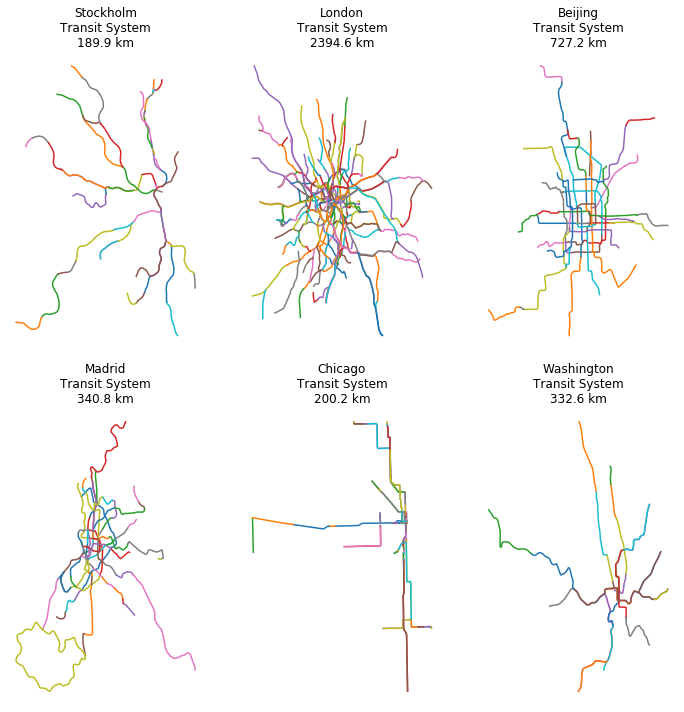

In [28]:
codes = 110, 69, 15, 71, 147, 252

fig, axx = plt.subplots(2, 3, figsize=(12, 12))

for code, ax in zip(codes, axx.flatten()):
    name = cities['name'][code]
    length = 0
    for line in tracks[tracks['city_id'] == code]['geometry']:
        xy = parse_linestring(line)
        ax.plot(xy[:,0], xy[:, 1])
        length += route_length(xy)
    ax.set_title(f'{name}\nTransit System\n{length:.1f} km')
    ax.axis(False);
    
# save into a PNG file
fig.savefig('map.png', dpi=300)

Now compile cities into a structure with the key of city name and the value of its transit system length.

In [72]:
systems = {}

for code in cities.index:
    length = 0
    name = cities['name'][code]
    for line in tracks[(tracks['city_id'] == code) & (tracks['closure'] > 2020)]['geometry']:
        try:
            xy = parse_linestring(line)
        except ValueError:
            continue
        length += route_length(xy)
    if length:
        print(f"{code} {name} {length:.1f} km")
        systems[name] = length

147 Chicago 165.0 km
280 Clermont-Ferrand 34.3 km
268 San Sebastián 81.4 km
29 Budapest 77.5 km
23 Bordeaux 135.9 km
19 Berlin 1.3 km
283 Besancon 35.1 km
45 Edinburgh 6.7 km
48 Glasgow 618.6 km
294 Le Mans 40.1 km
56 Hong Kong 35.4 km
63 Kuala Lumpur 86.4 km
300 Montpellier 108.1 km
70 Lyons 147.1 km
67 Lisbon 111.7 km
72 Manchester 8.4 km
82 Munich 183.2 km
74 Marseilles 78.2 km
79 Milan 613.8 km
310 Rouen 31.8 km
305 Dijon 41.1 km
317 Mulhouse 58.8 km
324 Nice 16.5 km
314 Reims 12.6 km
318 Nancy 20.1 km
308 Orleans 46.1 km
331 Le Havre 32.4 km
327 Lille 99.2 km
91 Osaka 2518.9 km
87 Naples 24.1 km
95 Paris 633.8 km
325 Toulouse 46.3 km
89 Newcastle-on-Tyne 195.6 km
328 Strasbourg 53.8 km
104 Salvador 27.2 km
99 Prague 115.6 km
307 Tours 30.0 km
103 Rome 155.5 km
275 Angers 37.2 km
106 São Paulo 839.7 km
286 Grenoble 91.0 km
111 Sydney 370.9 km
77 Melbourne 65.9 km
102 Rio de Janeiro 167.3 km
64 La Paz 34.2 km
114 Tokyo 4400.5 km
293 Brest 33.2 km
116 Venice 55.2 km
124 Valparaíso 55

In [73]:
# sort by values 
systems = {k: systems[k] for k in sorted(systems, key=systems.get)}

Text(0.5, 0, 'Total length of all lines (km)')

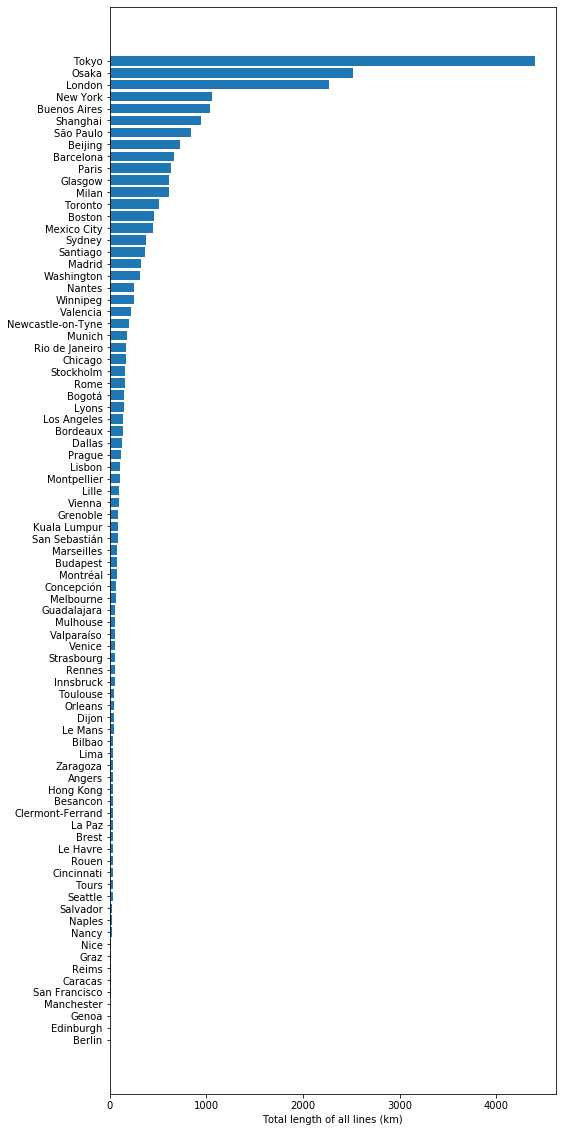

In [74]:
# plot the horizontal barplot of the length of city transport systems
fig, ax = plt.subplots(1, 1, figsize=(8, 20))
ax.barh(np.r_[:len(systems)], list(systems.values()))
ax.set_yticks(np.r_[:len(systems)])
ax.set_yticklabels(list(systems))
ax.set_xlabel('Total length of all lines (km)')

Text(0.5, 0, 'Total length of all lines (km)')

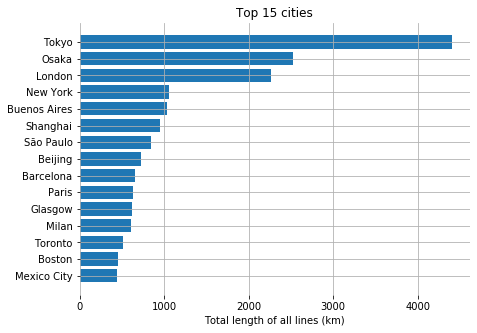

In [75]:
# plot the horizontal barplot of the length of city transport systems
# customize 
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
n = 15
ax.barh(np.r_[:n], list(systems.values())[-n:])
ax.set_yticks(np.r_[:n])
ax.set_yticklabels(list(systems)[-n:])
ax.set_title(f'Top {n} cities')
ax.set(frame_on=False)
ax.grid(True)
ax.set_xlabel('Total length of all lines (km)')


Text(0.5, 0, 'Total length of all lines (km)')

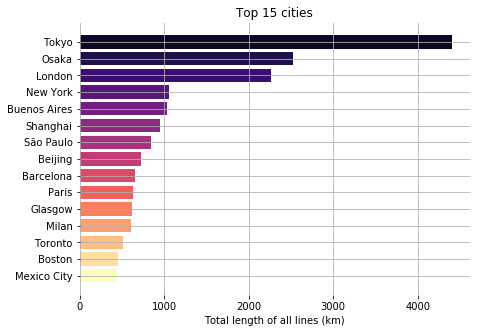

In [76]:
# plot the horizontal barplot of the length of city transport systems
# custom colors, sequential
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
n = 15
colors = [plt.cm.magma_r(i/n) for i in range(n)]
ax.barh(np.r_[:n], list(systems.values())[-n:], color=colors)
ax.set_yticks(np.r_[:n])
ax.set_yticklabels(list(systems)[-n:])
ax.set_title(f'Top {n} cities')
ax.set(frame_on=False)
ax.grid(True)
ax.set_xlabel('Total length of all lines (km)')

Text(0.5, 0, 'Total length of all blines (km)')

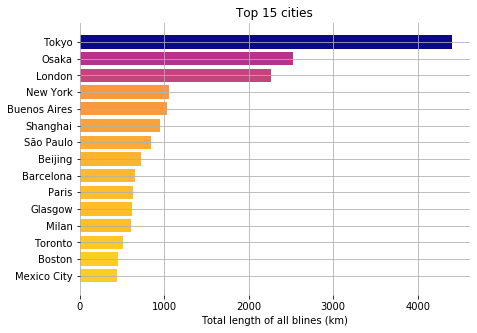

In [77]:
# plot the horizontal barplot of the length of city transport systems
# custom colors reflecting length

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
n = 15
lengths = list(systems.values())[-n:]
colors = [plt.cm.plasma_r(length/lengths[-1]) for length in lengths]
ax.barh(np.r_[:n], lengths, color=colors)
ax.set_yticks(np.r_[:n])
ax.set_yticklabels(list(systems)[-n:])
ax.set_title(f'Top {n} cities')
ax.set(frame_on=False)
ax.grid(True)
ax.set_xlabel('Total length of all blines (km)')

# Final Project

Work with the citylines datasets to produce several visualizations and present them in class. The first four visualization are specified. Come up with four additional ones for the presentation. Describe your work.

## Visualizaiton

1. Maps of 12 selected cities on a grid, e.g. 3$\times$4 with each line in a different color (mostly solved above)
2. A bar plot of the total lengths of each city's tranit lines (mostly solved above)
3. Total length of the transit lines across all cities across time (km), or change per decade. 
4. World map of cities with an indication of the size of the transit city as a dot size or color.
5. come up with an interesting question and visualization
6. come up with an interesting question and visualization
7. come up with an interesting question and visualization
8. come up with an interesting question and visualization
  

# Some tricks working with Pandas

## Joining country into the tracks table

In [78]:
country_tracks = tracks.join(cities['country'], on='city_id')
country_tracks

geometry  buildstart  opening  \
id                                                                             
1911  LINESTRING(19.0817752 47.5005079,19.0817355 47...         0.0      0.0   
2563  LINESTRING(16.4151057 48.1907238,16.4156455 48...         0.0      0.0   
2557  LINESTRING(16.4164437 48.1839655,16.4161534 48...         0.0      0.0   
2558  LINESTRING(16.4164901 48.1839473,16.416198 48....         0.0      0.0   
2564  LINESTRING(16.415259 48.1908074,16.4153634 48....         0.0      0.0   
...                                                 ...         ...      ...   
9732  LINESTRING(-3.838067 56.0044551,-3.8385588 56....         0.0      0.0   
9734  LINESTRING(-3.8549229 55.9960854,-3.8544735 55...         0.0      0.0   
9735  LINESTRING(-3.8597111 55.9955538,-3.8572319 55...         0.0      0.0   
9736  LINESTRING(-3.8544735 55.9961285,-3.8529015 55...         0.0      0.0   
9733  LINESTRING(-3.8599176 55.9955291,-3.8597111 55...         0.0      0.0   

       closure  length  city_id   country  
id                                         
1911  999999.0    6719       29   Hungary  
2563  999999.0     199      118   Austria  
2557  999999.0     925      118   Austria  
2558  999999.0     881      118   Austria  
2564  999999.0     213      118   Austria  
...        ...     ...      ...       ...  
9732  999999.0     383       48  Scotland  
9734  999999.0      28       48  Scotland  
9735  999999.0     305       48  Scotland  
9736  999999.0     828       48  Scotland  
9733  999999.0      13       48  Scotland  

[9271 rows x 7 columns]

## Selecting subsets based on multiple conditions

In [80]:
# tracks opened in the 1920s in Japan

country_tracks[
    (country_tracks['opening'] >= 1920) & 
    (country_tracks['opening'] < 1930) & 
    (country_tracks['country'] == 'Japan')]

geometry  buildstart  opening  \
id                                                                             
3434  LINESTRING(139.387327940585 35.3676500392482,1...      1926.0   1926.0   
3433  LINESTRING(139.407314018783 35.3308431975794,1...      1921.0   1921.0   
3920  LINESTRING(139.711149052338 35.6490980321521,1...      1924.0   1924.0   
1916  LINESTRING(139.480205670478 35.6721900413495,1...      1925.0   1925.0   
1925  LINESTRING(139.509718678068 35.6664581944277,1...      1922.0   1922.0   
...                                                 ...         ...      ...   
9422  LINESTRING(135.202047079675 34.226378987767,13...      1924.0   1924.0   
9455  LINESTRING(135.180830528459 34.2419836550834,1...      1924.0   1924.0   
9457  LINESTRING(135.7506901 34.4210337,135.7508 34....      1923.0   1923.0   
9458  LINESTRING(136.12311 34.78901,136.11943 34.788...      1922.0   1922.0   
9381  LINESTRING(134.99279 34.64876,134.99037 34.649...      1923.0   1923.0   

       closure  length  city_id country  
id                                       
3434  999999.0    3534      114   Japan  
3433  999999.0    4966      114   Japan  
3920    1969.0    1099      114   Japan  
1916  999999.0   16060      114   Japan  
1925  999999.0    2511      114   Japan  
...        ...     ...      ...     ...  
9422  999999.0    1497       91   Japan  
9455  999999.0   26892       91   Japan  
9457  999999.0    9407       91   Japan  
9458  999999.0   16618       91   Japan  
9381  999999.0   38963       91   Japan  

[250 rows x 7 columns]